# Project Description

Your client for this project is the HR Department at a software company.

    They want to try a new initiative to retain employees.
    The idea is to use data to predict whether an employee is likely to leave.
    Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
    They only want to deal with the data that is related to permanent employees.

Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

This suffers from the following problems:

    This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill       of the interviewer.
    The second problem is these insights can't be aggregated and interlaced across all employees who have left.
    The third is that it is too late by the time the proposed policy changes take effect.


The HR department wants to supplement employees' exit interviews with a more proactive approach.


#### Problem Statement: Using machine learning algorithms identify the employees who are likely to leave the organization.

In [1]:
# Import the required libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
!pip install plotly

In [3]:
conn = mysql.connector.connect(
   host="cpanel.insaid.co",
   user="student",
   passwd="student",
   db="Capstone2")

In [4]:
dept_data = pd.read_sql_query("SELECT * FROM department_data",conn)
dept_data.sample(5)

,dept_id,dept_name,dept_head
4,D00-SP,Support,Amelia Westray
1,D00-SS,Sales,Edward J Bayley
6,D00-PR,Procurement,Louie Viles
10,D00-PD,Product,Darcy Staines
0,D00-IT,IT,Henry Adey


In [5]:
dept_data.head(11)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [6]:
 dept_data['dept_name'].value_counts()

Engineering    1
Support        1
Management     1
Finance        1
Marketing      1
Admin          1
Temp           1
IT             1
Procurement    1
Sales          1
Product        1
Name: dept_name, dtype: int64

In [7]:
emp_d_data = pd.read_sql_query("SELECT * FROM employee_details_data",conn)
emp_d_data.sample(5)

,employee_id,age,gender,marital_status
14238,111402,27,Male,Unmarried
9096,108957,27,Male,Unmarried
3814,108567,33,Male,Married
9731,119330,26,Male,Unmarried
2143,109393,53,Female,Married


In [8]:
emp_d_data.info

<bound method DataFrame.info of        employee_id  age  gender marital_status
0           113558   43    Male        Married
1           112256   24  Female      Unmarried
2           112586   22  Female      Unmarried
3           108071   36    Male        Married
4           116915   38    Male        Married
...            ...  ...     ...            ...
14240       111781   26    Male      Unmarried
14241       100372   35    Male        Married
14242       128083   30  Female        Married
14243       118487   24    Male      Unmarried
14244       118849   39    Male        Married

[14245 rows x 4 columns]>

In [9]:
emp_data = pd.read_sql_query("SELECT * FROM employee_data",conn)
emp_data.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [10]:
emp_data.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14145,245.0,D00-SS,NaN,0.850785,6,NaN,medium,0.225084,Employed,5.0,101809
14146,192.0,D00-SS,NaN,0.951901,3,NaN,medium,0.539834,Employed,3.0,116153
14147,175.0,D00-MN,NaN,0.854538,4,NaN,medium,0.934465,Employed,3.0,119780
14148,268.0,D00-MT,NaN,0.900887,5,NaN,medium,0.906613,Left,5.0,115325
14149,268.0,D00-IT,1.0,0.897098,2,NaN,low,0.459371,Employed,4.0,112312


In [11]:
emp_data.shape

(14150, 11)

In [12]:
emp_data['status'].value_counts()

Employed    10784
Left         3366
Name: status, dtype: int64

10784 employees are still working in the company while 3366 employees are left.

In [13]:
emp_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [14]:
cols = emp_data.columns.tolist()
cols = ['employee_id','department','tenure','salary','avg_monthly_hrs','filed_complaint','n_projects','last_evaluation','recently_promoted','satisfaction','status']
cols

['employee_id',
 'department',
 'tenure',
 'salary',
 'avg_monthly_hrs',
 'filed_complaint',
 'n_projects',
 'last_evaluation',
 'recently_promoted',
 'satisfaction',
 'status']

In [15]:
emp_data = emp_data.reindex(columns = cols)
emp_data.head(5)

,employee_id,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
0,124467,None,4.0,medium,246.0,NaN,6,0.866838,NaN,0.134415,Left
1,112210,None,3.0,low,134.0,NaN,2,0.555718,NaN,0.511041,Left
2,126150,D00-SS,3.0,medium,156.0,1.0,2,0.474082,NaN,0.405101,Left
3,125346,D00-SP,4.0,low,256.0,NaN,6,0.961360,NaN,0.152974,Left
4,113707,D00-SS,3.0,medium,146.0,NaN,2,0.507349,NaN,0.434845,Left


In [16]:
emp_data.info

<bound method DataFrame.info of        employee_id department  tenure  salary  avg_monthly_hrs  \
0           124467       None     4.0  medium            246.0   
1           112210       None     3.0     low            134.0   
2           126150     D00-SS     3.0  medium            156.0   
3           125346     D00-SP     4.0     low            256.0   
4           113707     D00-SS     3.0  medium            146.0   
...            ...        ...     ...     ...              ...   
14145       101809     D00-SS     5.0  medium            245.0   
14146       116153     D00-SS     3.0  medium            192.0   
14147       119780     D00-MN     3.0  medium            175.0   
14148       115325     D00-MT     5.0  medium            268.0   
14149       112312     D00-IT     4.0     low            268.0   

       filed_complaint  n_projects  last_evaluation  recently_promoted  \
0                  NaN           6         0.866838                NaN   
1                  NaN     

In [17]:
emp_data.describe()

,employee_id,tenure,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction
count,14150.000000,14000.000000,14150.000000,2046.0,14150.000000,12663.000000,297.0,14000.000000
mean,112080.750247,3.499357,199.994346,1.0,3.778304,0.718399,1.0,0.621212
std,8748.202856,1.462584,50.833697,0.0,1.250162,0.173108,0.0,0.250482
min,0.000000,2.000000,49.000000,1.0,1.000000,0.316175,1.0,0.040058
25%,105772.500000,3.000000,155.000000,1.0,3.000000,0.563711,1.0,0.450356
50%,111291.500000,3.000000,199.000000,1.0,4.000000,0.724731,1.0,0.652394
75%,116650.750000,4.000000,245.000000,1.0,5.000000,0.871409,1.0,0.824925
max,148988.000000,10.000000,310.000000,1.0,7.000000,1.000000,1.0,1.000000


1. In data most of the employees are with tenure < 5 yrs.
2. Most of the employess are with last evaluation < 0.88

In [18]:
emp_data.isnull().any()

employee_id          False
department            True
tenure                True
salary               False
avg_monthly_hrs      False
filed_complaint       True
n_projects           False
last_evaluation       True
recently_promoted     True
satisfaction          True
status               False
dtype: bool

In [19]:
emp_data.isnull().sum()

employee_id              0
department             707
tenure                 150
salary                   0
avg_monthly_hrs          0
filed_complaint      12104
n_projects               0
last_evaluation       1487
recently_promoted    13853
satisfaction           150
status                   0
dtype: int64

In [20]:
emp_data.department.unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

In [21]:
emp_data["department"].replace(to_replace ="-IT", value ="D00-IT",inplace=True)  

In [22]:
emp_data.department.unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], dtype=object)

In [23]:
emp_data.groupby('status').mean()

,employee_id,tenure,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction
status,,,,,,,,
Employed,111039.868138,3.383142,197.890486,1.0,3.758995,0.714363,1.0,0.675678
Left,115415.531194,3.869396,206.734700,1.0,3.840166,0.730765,1.0,0.447786


1.Left employess have higher avg_monthly_hrs than those of still working employees.
2.Recently promoted employees are less likely to leave.
3.Employees who left the organization have satisfaction avg less than that of still working employees.

In [24]:
ten = emp_data.tenure.value_counts().to_dict()

for k, v in ten.items():
    print( k, v )

3.0 6018
2.0 3023
4.0 2394
5.0 1369
6.0 660
10.0 201
7.0 180
8.0 155


<BarContainer object of 8 artists>

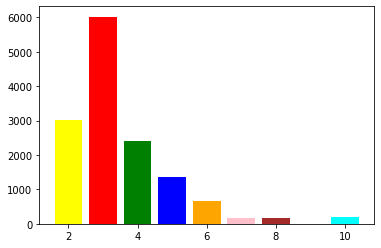

In [25]:
plt.bar(ten.keys(),ten.values(),color=['red','yellow','green','blue','orange','cyan','pink','brown'])

In [26]:
# NaN values in filed_complaint and recently_promoted are replaced with 0.
emp_data['filed_complaint'] = emp_data['filed_complaint'].fillna(0)
emp_data['recently_promoted'] = emp_data['recently_promoted'].fillna(0)
emp_data.head(5)

,employee_id,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
0,124467,None,4.0,medium,246.0,0.0,6,0.866838,0.0,0.134415,Left
1,112210,None,3.0,low,134.0,0.0,2,0.555718,0.0,0.511041,Left
2,126150,D00-SS,3.0,medium,156.0,1.0,2,0.474082,0.0,0.405101,Left
3,125346,D00-SP,4.0,low,256.0,0.0,6,0.961360,0.0,0.152974,Left
4,113707,D00-SS,3.0,medium,146.0,0.0,2,0.507349,0.0,0.434845,Left


In [27]:
emp_data.isnull().sum()

employee_id             0
department            707
tenure                150
salary                  0
avg_monthly_hrs         0
filed_complaint         0
n_projects              0
last_evaluation      1487
recently_promoted       0
satisfaction          150
status                  0
dtype: int64

In [28]:
fc = emp_data.filed_complaint.value_counts().to_dict()

for k, v in fc.items():
    print( k, v )

0.0 12104
1.0 2046


<BarContainer object of 2 artists>

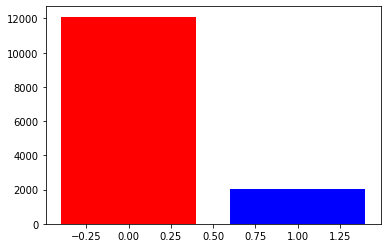

In [29]:
plt.bar(fc.keys(),fc.values(), color=['red','blue'])

In [30]:
rp = emp_data.recently_promoted.value_counts().to_dict()

for k, v in rp.items():
    print( k, v )

0.0 13853
1.0 297


<BarContainer object of 2 artists>

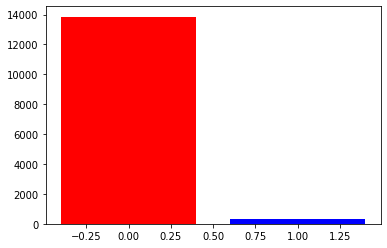

In [31]:
plt.bar(rp.keys(),rp.values(), color=['red','blue'])

Very few employess are recenlty promoted in this company.

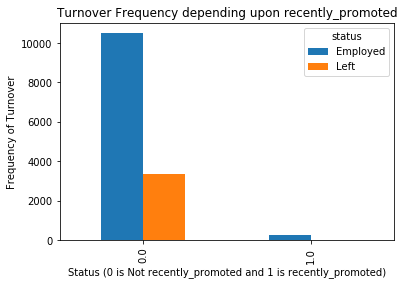

In [32]:
# Let us see among left employees what is the scenario based on recently_promoted
pd.crosstab(emp_data.recently_promoted,emp_data.status).plot(kind='bar')
plt.title('Turnover Frequency depending upon recently_promoted')
plt.xlabel('Status (0 is Not recently_promoted and 1 is recently_promoted)')
plt.ylabel('Frequency of Turnover')
plt.savefig('Overall recently_promoted analysis')

No employee has left after promotion ( Promotion can be one of the way to stop attrition)

In [33]:
# Department wise left and employed
dept_status = emp_data[["department","status"]]
dept_status

,department,status
0,None,Left
1,None,Left
2,D00-SS,Left
3,D00-SP,Left
4,D00-SS,Left
...,...,...
14145,D00-SS,Employed
14146,D00-SS,Employed
14147,D00-MN,Employed
14148,D00-MT,Left


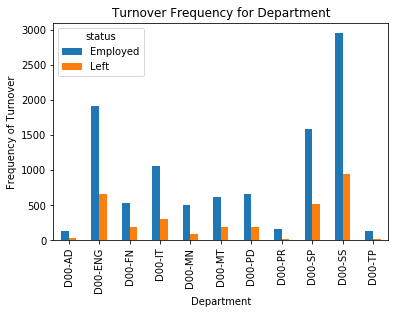

In [34]:
pd.crosstab(dept_status.department,dept_status.status).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

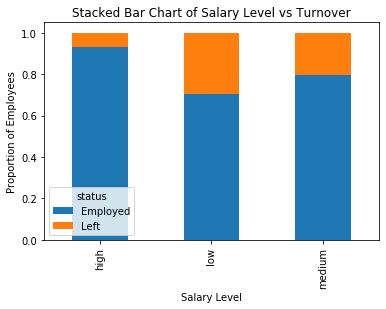

In [35]:
table=pd.crosstab(emp_data.salary, emp_data.status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

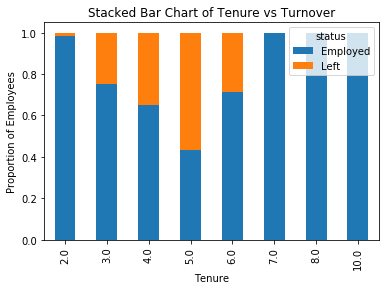

In [36]:
# Tenure Vs Status
table=pd.crosstab(emp_data.tenure, emp_data.status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Tenure vs Turnover')
plt.xlabel('Tenure')
plt.ylabel('Proportion of Employees')
plt.savefig('Tenure_bar_chart')

People are leaving as tenure increases upto 5 yrs after 5 yrs attrition decreases and employees after tenure>=7 yrs prefer to stay in the company.

In [37]:
fc_data = emp_data[(emp_data == 'Left').any(axis=1)]
fc_data.head(5)

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,employee_id,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
0,124467,None,4.0,medium,246.0,0.0,6,0.866838,0.0,0.134415,Left
1,112210,None,3.0,low,134.0,0.0,2,0.555718,0.0,0.511041,Left
2,126150,D00-SS,3.0,medium,156.0,1.0,2,0.474082,0.0,0.405101,Left
3,125346,D00-SP,4.0,low,256.0,0.0,6,0.961360,0.0,0.152974,Left
4,113707,D00-SS,3.0,medium,146.0,0.0,2,0.507349,0.0,0.434845,Left


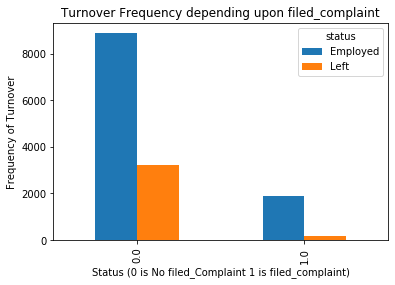

In [38]:
pd.crosstab(emp_data.filed_complaint,emp_data.status).plot(kind='bar')
plt.title('Turnover Frequency depending upon filed_complaint')
plt.xlabel('Status (0 is No filed_Complaint 1 is filed_complaint)')
plt.ylabel('Frequency of Turnover')
plt.savefig('Overall filed_complaint analysis')

Comparatively less employees who have filed compaint have left the company. 

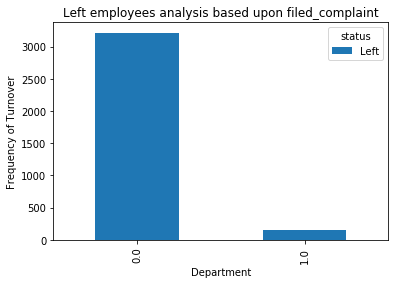

In [39]:
pd.crosstab(fc_data.filed_complaint,fc_data.status).plot(kind='bar')
plt.title('Left employees analysis based upon filed_complaint')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

We can say from this plot that employees who do not file complaint are large in number to leave company.

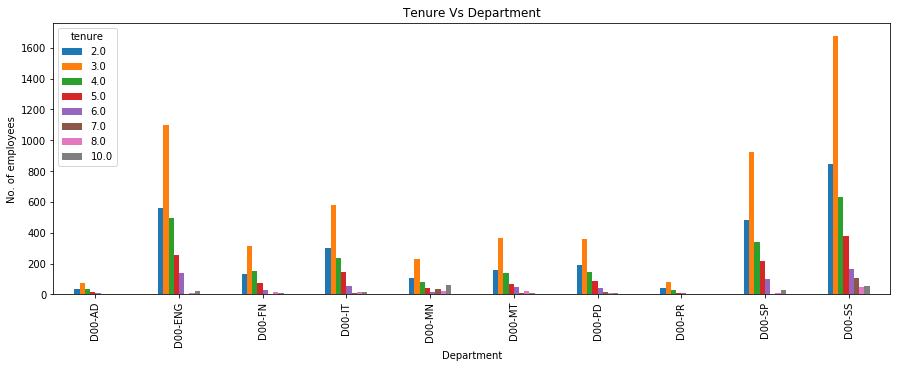

In [40]:
pd.crosstab(emp_data.department,emp_data.tenure).plot(kind='bar',figsize=(15,5))
plt.title('Tenure Vs Department')
plt.xlabel('Department')
plt.ylabel('No. of employees')
plt.savefig('department_bar_chart')

In every department maximum number of employees have served tenure of 3 yrs.

Text(0.5, 1.0, 'Tenure Vs Department')

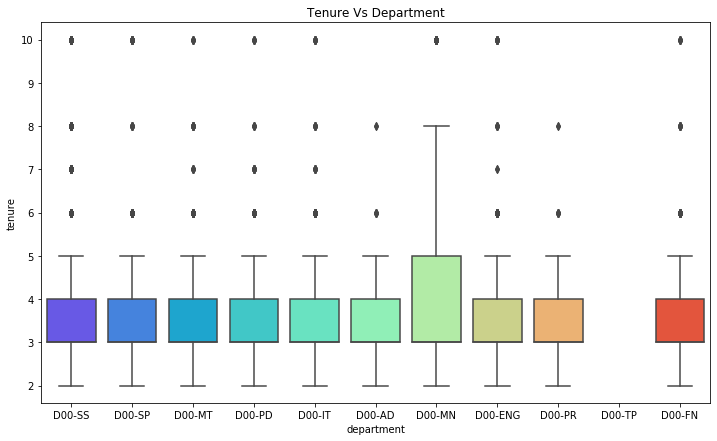

In [41]:
# which dept has highest tenure 
plt.figure(figsize=(12,7))
sns.boxplot(data=emp_data, x='department', y='tenure', palette='rainbow')

plt.title('Tenure Vs Department')

D00-MN has employees who have served with varied tenure.

In [42]:
df = pd.merge(emp_data, emp_d_data, how='left', on=['employee_id'])
df

,employee_id,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status,age,gender,marital_status
0,124467,None,4.0,medium,246.0,0.0,6,0.866838,0.0,0.134415,Left,42.0,Female,Married
1,112210,None,3.0,low,134.0,0.0,2,0.555718,0.0,0.511041,Left,23.0,Female,Unmarried
2,126150,D00-SS,3.0,medium,156.0,1.0,2,0.474082,0.0,0.405101,Left,24.0,Female,Unmarried
3,125346,D00-SP,4.0,low,256.0,0.0,6,0.961360,0.0,0.152974,Left,51.0,Female,Married
4,113707,D00-SS,3.0,medium,146.0,0.0,2,0.507349,0.0,0.434845,Left,23.0,Female,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14145,101809,D00-SS,5.0,medium,245.0,0.0,6,0.850785,0.0,0.225084,Employed,45.0,Female,Married
14146,116153,D00-SS,3.0,medium,192.0,0.0,3,0.951901,0.0,0.539834,Employed,22.0,Female,Unmarried
14147,119780,D00-MN,3.0,medium,175.0,0.0,4,0.854538,0.0,0.934465,Employed,25.0,Male,Unmarried
14148,115325,D00-MT,5.0,medium,268.0,0.0,5,0.900887,0.0,0.906613,Left,50.0,Male,Married


In [43]:
cols1 = df.columns.tolist()
cols1 = ['employee_id','age','gender','marital_status','department','tenure','salary','avg_monthly_hrs','filed_complaint','n_projects','last_evaluation','recently_promoted','satisfaction','status']
cols1

['employee_id',
 'age',
 'gender',
 'marital_status',
 'department',
 'tenure',
 'salary',
 'avg_monthly_hrs',
 'filed_complaint',
 'n_projects',
 'last_evaluation',
 'recently_promoted',
 'satisfaction',
 'status']

In [44]:
df = df.reindex(columns = cols1)
df.head(5)

,employee_id,age,gender,marital_status,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
0,124467,42.0,Female,Married,None,4.0,medium,246.0,0.0,6,0.866838,0.0,0.134415,Left
1,112210,23.0,Female,Unmarried,None,3.0,low,134.0,0.0,2,0.555718,0.0,0.511041,Left
2,126150,24.0,Female,Unmarried,D00-SS,3.0,medium,156.0,1.0,2,0.474082,0.0,0.405101,Left
3,125346,51.0,Female,Married,D00-SP,4.0,low,256.0,0.0,6,0.961360,0.0,0.152974,Left
4,113707,23.0,Female,Unmarried,D00-SS,3.0,medium,146.0,0.0,2,0.507349,0.0,0.434845,Left


In [45]:
df.shape

(14150, 14)

In [46]:
df.isnull().sum()

employee_id             0
age                     5
gender                  5
marital_status          5
department            707
tenure                150
salary                  0
avg_monthly_hrs         0
filed_complaint         0
n_projects              0
last_evaluation      1487
recently_promoted       0
satisfaction          150
status                  0
dtype: int64

In [47]:
df.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
14145     True
14146     True
14147     True
14148     True
14149     True
Length: 14150, dtype: bool

In [48]:
df.drop_duplicates(subset=['employee_id'], keep='first',inplace = True)

In [49]:
df.shape

(14117, 14)

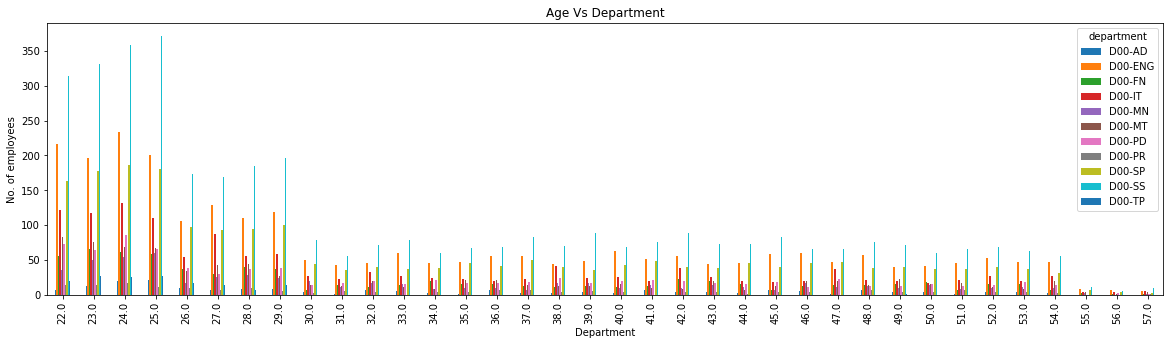

In [50]:
pd.crosstab(df.age,df.department).plot(kind='bar',figsize=(20,5))
plt.title('Age Vs Department')
plt.xlabel('Department')
plt.ylabel('No. of employees')
plt.savefig('department_age_bar_chart')

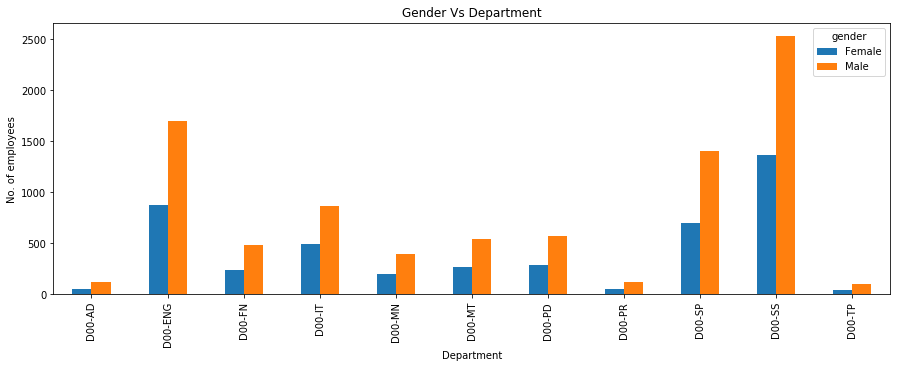

In [51]:
pd.crosstab(df.department,df.gender).plot(kind='bar',figsize=(15,5))
plt.title('Gender Vs Department')
plt.xlabel('Department')
plt.ylabel('No. of employees')
plt.savefig('department_Gender_bar_chart')

In every department there are more number of male employees

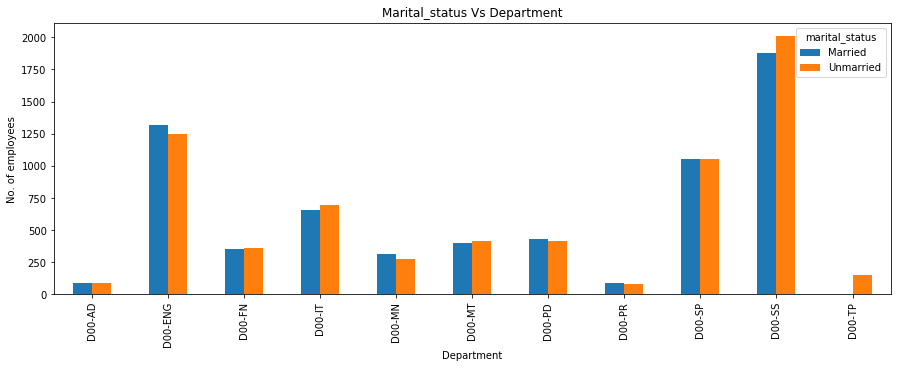

In [52]:
pd.crosstab(df.department,df.marital_status).plot(kind='bar',figsize=(15,5))
plt.title('Marital_status Vs Department')
plt.xlabel('Department')
plt.ylabel('No. of employees')
plt.savefig('department_Marital_Status_bar_chart')

D00-SS has higher number of unmarried employees. D00-TP has only unmarried employees.

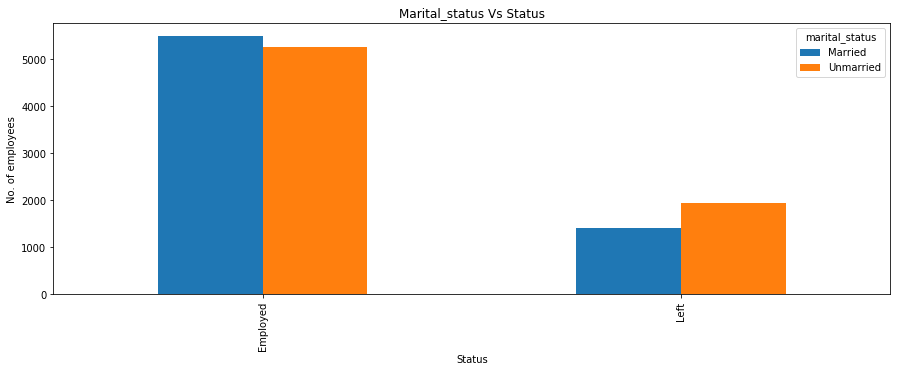

In [53]:
pd.crosstab(df.status,df.marital_status).plot(kind='bar',figsize=(15,5))
plt.title('Marital_status Vs Status')
plt.xlabel('Status')
plt.ylabel('No. of employees')
plt.savefig('Status Vs Marital_Status_bar_chart')

Unmarried people are little more likely to leave the company

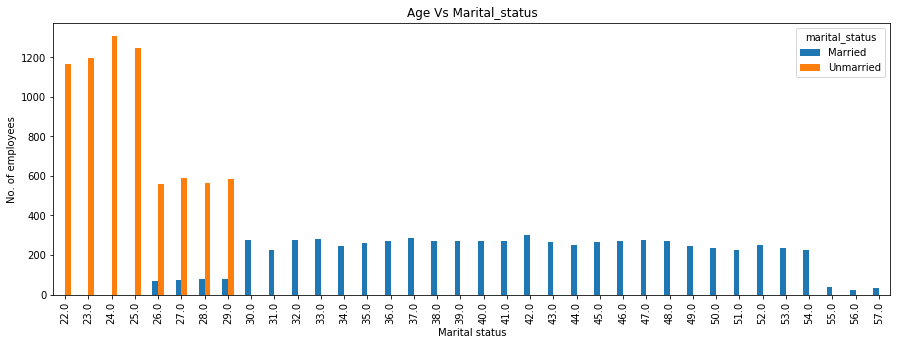

In [54]:
# Age Vs married and Unmarried
pd.crosstab(df.age,df.marital_status).plot(kind='bar',figsize=(15,5))
plt.title('Age Vs Marital_status')
plt.xlabel('Marital status')
plt.ylabel('No. of employees')
plt.savefig('Age Vs Marital_Status_bar_chart')

Text(0, 0.5, 'No. of employees')

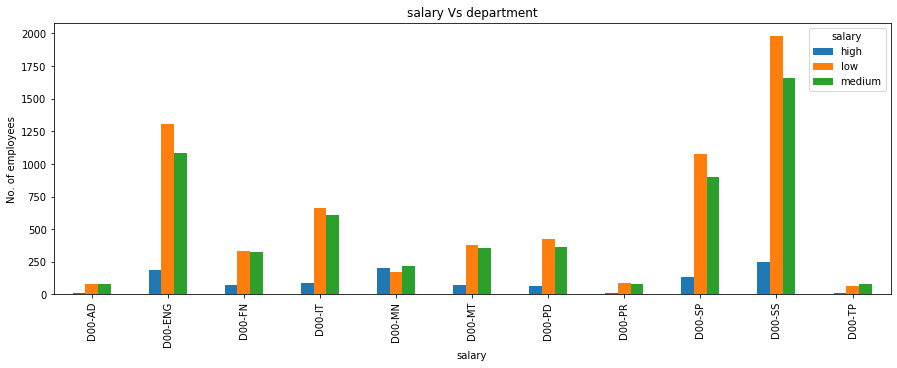

In [55]:
# Age Vs married and Unmarried
pd.crosstab(df.department,df.salary).plot(kind='bar',figsize=(15,5))
plt.title('salary Vs department')
plt.xlabel('salary')
plt.ylabel('No. of employees')

Text(0, 0.5, 'No. of employees')

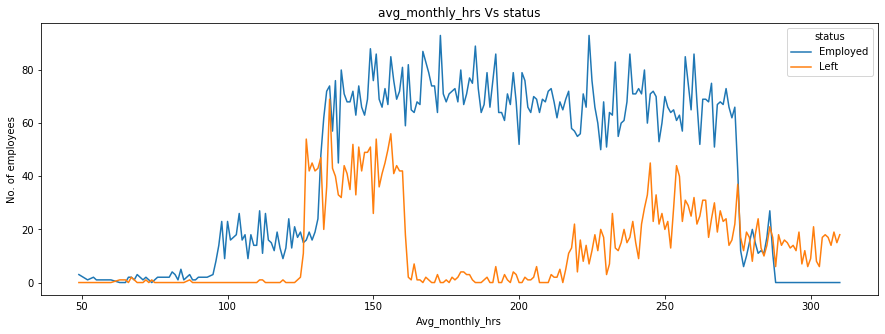

In [56]:
# avg_monthly_hrs Vs status
pd.crosstab(df.avg_monthly_hrs,df.status).plot(kind='line',figsize=(15,5))
plt.title('avg_monthly_hrs Vs status')
plt.xlabel('Avg_monthly_hrs')
plt.ylabel('No. of employees')

People leaving mostly fall in the region 125-160 Avg working hrs and 240-275 Avg mothly hrs

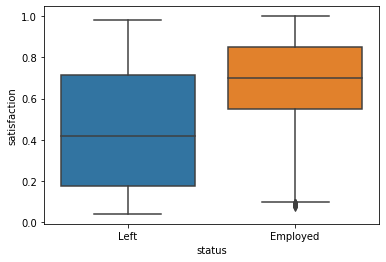

In [57]:
sns.boxplot(data = df, x ='status', y = 'satisfaction',)

In [58]:
df.department.unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], dtype=object)

In [59]:
df['department'].value_counts()

D00-SS     3896
D00-ENG    2573
D00-SP     2108
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

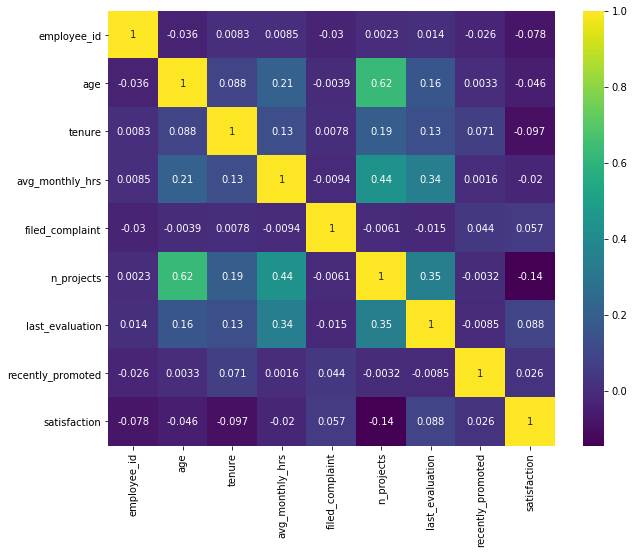

In [60]:
corr_mat = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

# Treating Missing Values

In [61]:
df.isnull().sum()

employee_id             0
age                     1
gender                  1
marital_status          1
department            706
tenure                150
salary                  0
avg_monthly_hrs         0
filed_complaint         0
n_projects              0
last_evaluation      1487
recently_promoted       0
satisfaction          150
status                  0
dtype: int64

In [62]:
df_age_null = df.loc[df['age'].isnull()]
df_age_null.head()

,employee_id,age,gender,marital_status,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
34,0,NaN,NaN,NaN,D00-SS,4.0,low,284.0,0.0,6,0.852702,0.0,0.069168,Left


In [63]:
df = df[df.employee_id != 0] # Removing row with employee_id = 0

In [64]:
df.isnull().sum()

employee_id             0
age                     0
gender                  0
marital_status          0
department            706
tenure                150
salary                  0
avg_monthly_hrs         0
filed_complaint         0
n_projects              0
last_evaluation      1487
recently_promoted       0
satisfaction          150
status                  0
dtype: int64

In [65]:
df_tenure_null = df.loc[df['tenure'].isnull()]
df_tenure_null.head()

,employee_id,age,gender,marital_status,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
44,120360,24.0,Female,Unmarried,D00-TP,NaN,medium,125.0,0.0,3,NaN,0.0,NaN,Left
245,116012,25.0,Female,Unmarried,D00-TP,NaN,low,124.0,0.0,3,NaN,0.0,NaN,Left
251,116287,22.0,Female,Unmarried,D00-TP,NaN,medium,119.0,0.0,2,NaN,0.0,NaN,Left
414,115235,24.0,Female,Unmarried,D00-TP,NaN,low,126.0,0.0,2,NaN,0.0,NaN,Left
468,122769,24.0,Female,Unmarried,D00-TP,NaN,high,65.0,0.0,1,NaN,0.0,NaN,Left


In [66]:
df_tenure_null.shape

(150, 14)

In [67]:
df_tenure_null.isnull().sum()

employee_id            0
age                    0
gender                 0
marital_status         0
department             0
tenure               150
salary                 0
avg_monthly_hrs        0
filed_complaint        0
n_projects             0
last_evaluation      150
recently_promoted      0
satisfaction         150
status                 0
dtype: int64

This means Emploeess with 150 null values in tenure also have 150 null values in satisfaction and same values for last_evaluation. 

In [68]:
df_tenure_null['status'].value_counts()

Employed    130
Left         20
Name: status, dtype: int64

In [69]:
df_tenure_null.age.unique()

array([24., 25., 22., 23., 49., 28., 26., 29., 27.])

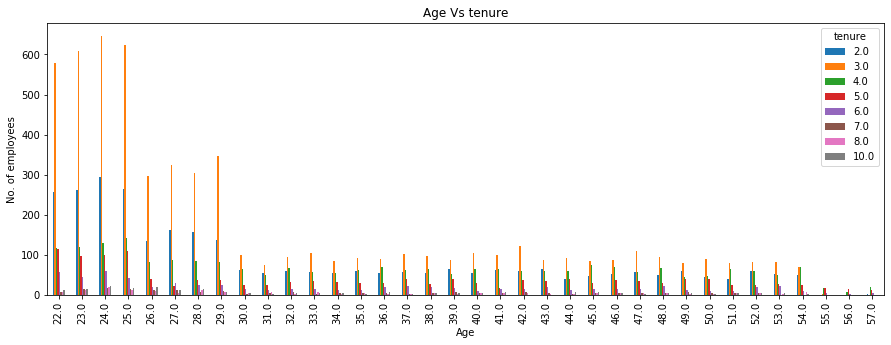

In [70]:
pd.crosstab(df.age,df.tenure).plot(kind='bar',figsize=(15,5))
plt.title('Age Vs tenure')
plt.xlabel('Age')
plt.ylabel('No. of employees')
plt.savefig('Age Vs Tenure_bar_chart')

As for all the ages maximum number of employees belong to the tenure of 3 years. Let's replace all null tenure values by 3

In [71]:
df_tenure3 = df[df['tenure']==3]
df_tenure3.head()

,employee_id,age,gender,marital_status,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
1,112210,23.0,Female,Unmarried,None,3.0,low,134.0,0.0,2,0.555718,0.0,0.511041,Left
2,126150,24.0,Female,Unmarried,D00-SS,3.0,medium,156.0,1.0,2,0.474082,0.0,0.405101,Left
4,113707,23.0,Female,Unmarried,D00-SS,3.0,medium,146.0,0.0,2,0.507349,0.0,0.434845,Left
5,121685,23.0,Female,Unmarried,D00-MT,3.0,low,135.0,0.0,2,0.482184,0.0,0.381545,Left
13,111718,22.0,Female,Unmarried,D00-MT,3.0,low,155.0,0.0,2,0.521682,0.0,0.387475,Left


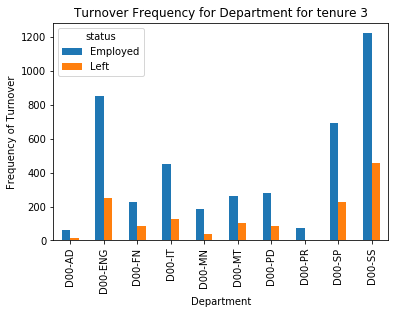

In [72]:
pd.crosstab(df_tenure3.department,df_tenure3.status).plot(kind='bar')
plt.title('Turnover Frequency for Department for tenure 3')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

For tenure 3 data maximum employed people and also maximum people who have left organisation belong to D00-SS department

In [73]:
df["tenure"].fillna(3, inplace = True) 

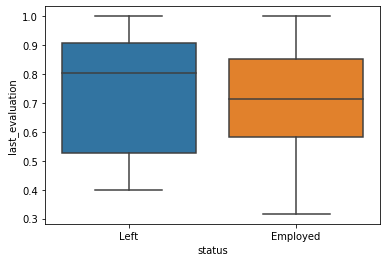

In [74]:
sns.boxplot(data = df, x ='status', y = 'last_evaluation',)

Text(0.5, 1.0, 'Histogram showing the distribution of  last_evaluation values')

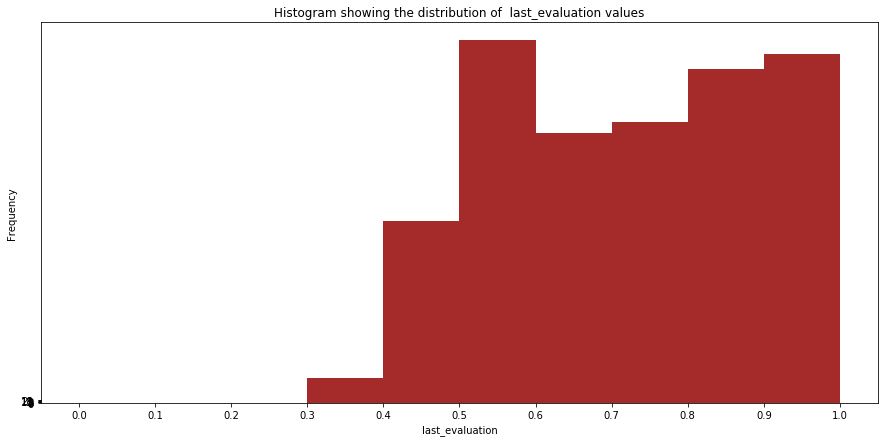

In [75]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
df['last_evaluation'].plot(kind='hist', bins = bins, figsize=(15, 7), color='brown', yticks=np.arange(0, 22, 3), xticks=bins)

plt.xlabel('last_evaluation')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of  last_evaluation values')

In [76]:
df_left = df[df['status']=='Left']

Text(0.5, 1.0, 'Histogram showing the distribution of  last_evaluation values only for left')

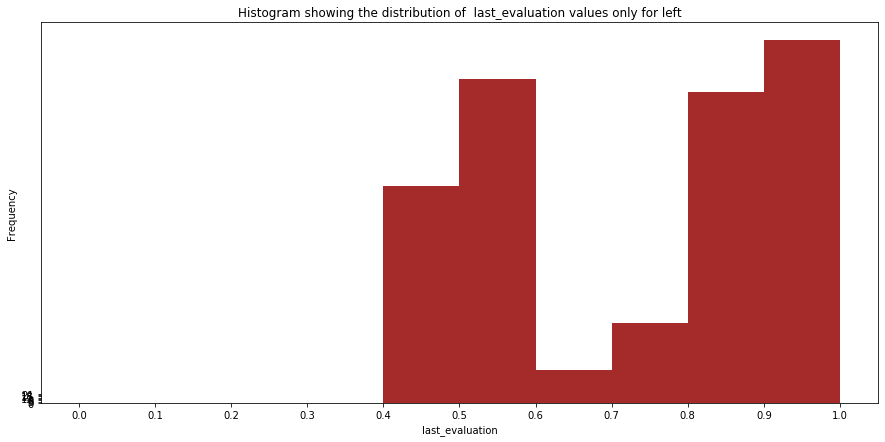

In [77]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
df_left['last_evaluation'].plot(kind='hist', bins = bins, figsize=(15, 7), color='brown', yticks=np.arange(0, 22, 3), xticks=bins)

plt.xlabel('last_evaluation')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of  last_evaluation values only for left')

In [78]:
df_left.last_evaluation.mean()

0.7306628731078892

In [79]:
df_employed = df[df['status']=='Employed']

Text(0.5, 1.0, 'Histogram showing the distribution of  last_evaluation values only for employed')

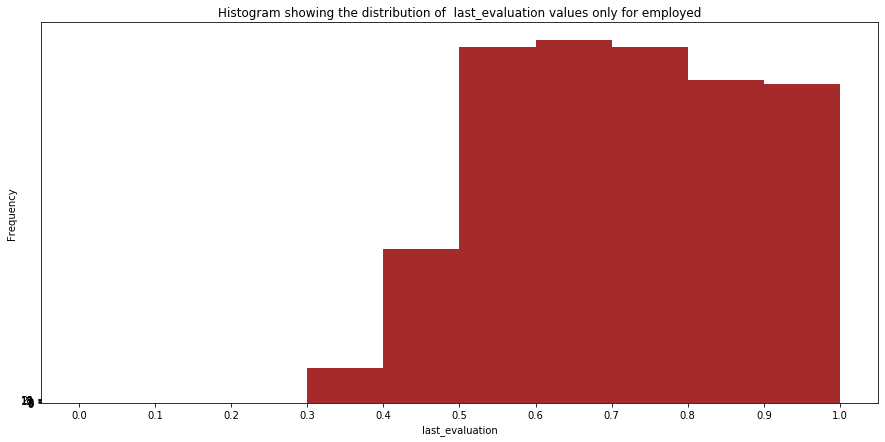

In [80]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
df_employed['last_evaluation'].plot(kind='hist', bins = bins, figsize=(15, 7), color='brown', yticks=np.arange(0, 22, 3), xticks=bins)

plt.xlabel('last_evaluation')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of  last_evaluation values only for employed')

In [81]:
df_employed.last_evaluation.mean()

0.7142988627677427

In [82]:
df_left["last_evaluation"].fillna(0.730702, inplace = True)

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [83]:
df_employed["last_evaluation"].fillna(0.714299, inplace = True)

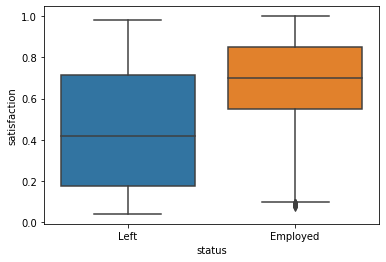

In [84]:
sns.boxplot(data = df, x ='status', y = 'satisfaction')

Text(0.5, 1.0, 'Histogram showing the distribution of  satisfaction values')

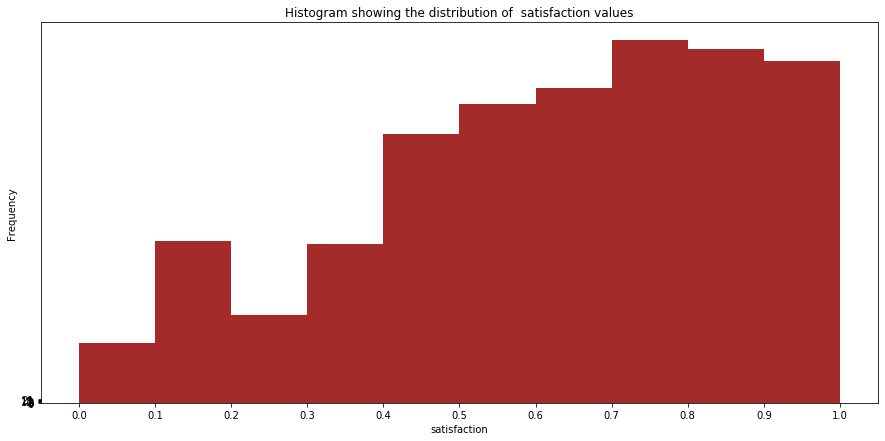

In [85]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
df['satisfaction'].plot(kind='hist', bins = bins, figsize=(15, 7), color='brown', yticks=np.arange(0, 22, 3), xticks=bins)

plt.xlabel('satisfaction')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of  satisfaction values')

Text(0.5, 1.0, 'Histogram showing the distribution of  satisfaction values only for left')

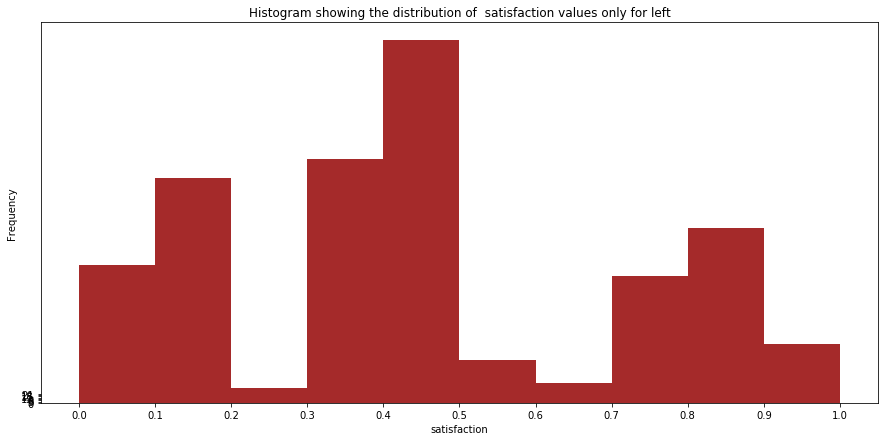

In [86]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
df_left['satisfaction'].plot(kind='hist', bins = bins, figsize=(15, 7), color='brown', yticks=np.arange(0, 22, 3), xticks=bins)

plt.xlabel('satisfaction')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of  satisfaction values only for left')

In [87]:
df_left.satisfaction.mean()

0.44774634389805074

Text(0.5, 1.0, 'Histogram showing the distribution of  satisfaction values only for employed')

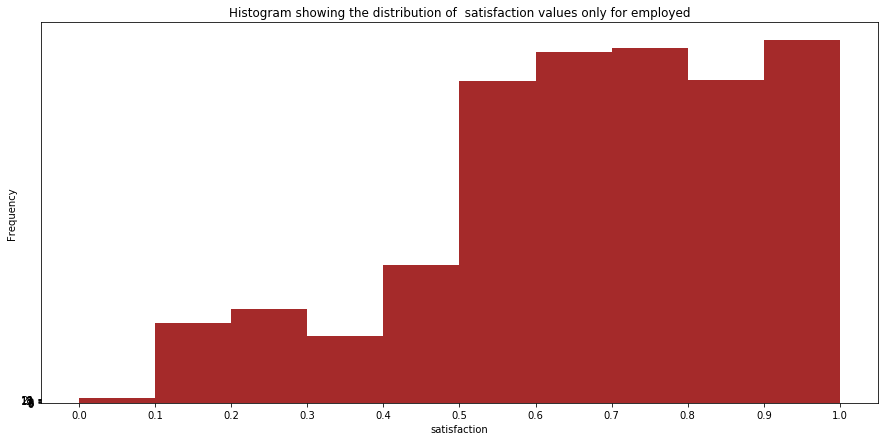

In [88]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
df_employed['satisfaction'].plot(kind='hist', bins = bins, figsize=(15, 7), color='brown', yticks=np.arange(0, 22, 3), xticks=bins)

plt.xlabel('satisfaction')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of  satisfaction values only for employed')

In [89]:
df_employed.satisfaction.mean()

0.6757732253409852

In [90]:
df_left["satisfaction"].fillna(0.447633, inplace = True)

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [91]:
df_employed["satisfaction"].fillna(0.675773, inplace = True)

In [92]:
df_left.isnull().sum()

employee_id            0
age                    0
gender                 0
marital_status         0
department           205
tenure                 0
salary                 0
avg_monthly_hrs        0
filed_complaint        0
n_projects             0
last_evaluation        0
recently_promoted      0
satisfaction           0
status                 0
dtype: int64

In [93]:
df_employed.isnull().sum()

employee_id            0
age                    0
gender                 0
marital_status         0
department           501
tenure                 0
salary                 0
avg_monthly_hrs        0
filed_complaint        0
n_projects             0
last_evaluation        0
recently_promoted      0
satisfaction           0
status                 0
dtype: int64

In [94]:
df.isnull().sum()

employee_id             0
age                     0
gender                  0
marital_status          0
department            706
tenure                  0
salary                  0
avg_monthly_hrs         0
filed_complaint         0
n_projects              0
last_evaluation      1487
recently_promoted       0
satisfaction          150
status                  0
dtype: int64

In [95]:
df1 = df_employed.append([df_left])

In [96]:
df1.head(5)

,employee_id,age,gender,marital_status,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
1686,104890,35.0,Male,Married,D00-SP,6.0,low,257.0,1.0,6,0.497813,0.0,0.418404,Employed
1689,118558,27.0,Male,Unmarried,D00-MN,3.0,low,178.0,0.0,3,0.933046,0.0,0.826652,Employed
1690,104159,23.0,Male,Unmarried,D00-SS,10.0,high,242.0,0.0,3,0.924484,0.0,0.672942,Employed
1691,113352,51.0,Male,Married,D00-IT,7.0,low,266.0,0.0,5,0.603819,0.0,0.165847,Employed
1692,106436,36.0,Male,Married,D00-SS,3.0,medium,252.0,1.0,4,0.630359,0.0,0.662523,Employed


In [97]:
df1.isnull().sum()

employee_id            0
age                    0
gender                 0
marital_status         0
department           706
tenure                 0
salary                 0
avg_monthly_hrs        0
filed_complaint        0
n_projects             0
last_evaluation        0
recently_promoted      0
satisfaction           0
status                 0
dtype: int64

In [98]:
df1.shape

(14116, 14)

In [99]:
df1.head()

,employee_id,age,gender,marital_status,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
1686,104890,35.0,Male,Married,D00-SP,6.0,low,257.0,1.0,6,0.497813,0.0,0.418404,Employed
1689,118558,27.0,Male,Unmarried,D00-MN,3.0,low,178.0,0.0,3,0.933046,0.0,0.826652,Employed
1690,104159,23.0,Male,Unmarried,D00-SS,10.0,high,242.0,0.0,3,0.924484,0.0,0.672942,Employed
1691,113352,51.0,Male,Married,D00-IT,7.0,low,266.0,0.0,5,0.603819,0.0,0.165847,Employed
1692,106436,36.0,Male,Married,D00-SS,3.0,medium,252.0,1.0,4,0.630359,0.0,0.662523,Employed


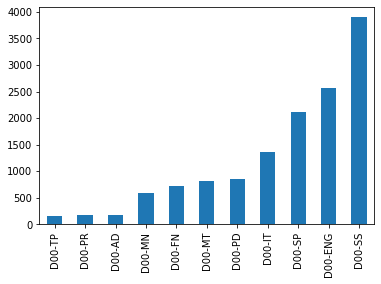

In [100]:
df1.department.value_counts().sort_values().plot(kind = 'bar')

In [101]:
Test = df1[df1['department'].isnull()]

In [102]:
Test.isnull().sum()     # Data with department null values

employee_id            0
age                    0
gender                 0
marital_status         0
department           706
tenure                 0
salary                 0
avg_monthly_hrs        0
filed_complaint        0
n_projects             0
last_evaluation        0
recently_promoted      0
satisfaction           0
status                 0
dtype: int64

In [103]:
X_new = Test.drop('department', axis=1)

In [104]:
Train = df1[df1['department'].notnull()] # Data with no null values 

In [105]:
Train.drop('employee_id',axis =1)

,age,gender,marital_status,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status
1686,35.0,Male,Married,D00-SP,6.0,low,257.0,1.0,6,0.497813,0.0,0.418404,Employed
1689,27.0,Male,Unmarried,D00-MN,3.0,low,178.0,0.0,3,0.933046,0.0,0.826652,Employed
1690,23.0,Male,Unmarried,D00-SS,10.0,high,242.0,0.0,3,0.924484,0.0,0.672942,Employed
1691,51.0,Male,Married,D00-IT,7.0,low,266.0,0.0,5,0.603819,0.0,0.165847,Employed
1692,36.0,Male,Married,D00-SS,3.0,medium,252.0,1.0,4,0.630359,0.0,0.662523,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14064,27.0,Male,Unmarried,D00-MT,5.0,medium,251.0,0.0,4,0.997651,0.0,0.866885,Left
14067,22.0,Male,Unmarried,D00-SS,3.0,low,142.0,0.0,2,0.541133,0.0,0.476957,Left
14084,29.0,Male,Unmarried,D00-ENG,5.0,medium,275.0,0.0,4,0.906265,0.0,0.948739,Left
14099,27.0,Male,Unmarried,D00-SS,4.0,low,274.0,0.0,2,0.549974,0.0,0.765397,Left


In [106]:
Train.status[Train.status == 'Employed'] = 0
Train.status[Train.status == 'Left'] = 1

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [107]:
Train.status.unique()

array([0, 1], dtype=object)

In [108]:
Train.salary[Train.salary == 'low'] = 0
Train.salary[Train.salary == 'medium'] = 1
Train.salary[Train.salary == 'high'] = 2

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This i

In [109]:
Train.salary.unique()

array([0, 2, 1], dtype=object)

In [110]:
Train.marital_status[Train.marital_status == 'Unmarried'] = 0
Train.marital_status[Train.marital_status == 'Married'] = 1
Train.marital_status.unique()

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0], dtype=object)

In [111]:
Train.gender[Train.gender == 'Male'] = 0
Train.gender[Train.gender == 'Female'] = 1
Train.gender.unique()

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1], dtype=object)

In [112]:
# Label encoding for department
from sklearn.preprocessing import LabelEncoder
Train_sklearn = Train.copy()
lb_make = LabelEncoder()
Train_sklearn['dept_code'] = lb_make.fit_transform(Train['department'])

In [113]:
Train_sklearn.head()

,employee_id,age,gender,marital_status,department,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status,dept_code
1686,104890,35.0,0,1,D00-SP,6.0,0,257.0,1.0,6,0.497813,0.0,0.418404,0,8
1689,118558,27.0,0,0,D00-MN,3.0,0,178.0,0.0,3,0.933046,0.0,0.826652,0,4
1690,104159,23.0,0,0,D00-SS,10.0,2,242.0,0.0,3,0.924484,0.0,0.672942,0,9
1691,113352,51.0,0,1,D00-IT,7.0,0,266.0,0.0,5,0.603819,0.0,0.165847,0,3
1692,106436,36.0,0,1,D00-SS,3.0,1,252.0,1.0,4,0.630359,0.0,0.662523,0,9


In [114]:
Train_sklearn.drop(['employee_id', 'department'], axis = 1)

,age,gender,marital_status,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,satisfaction,status,dept_code
1686,35.0,0,1,6.0,0,257.0,1.0,6,0.497813,0.0,0.418404,0,8
1689,27.0,0,0,3.0,0,178.0,0.0,3,0.933046,0.0,0.826652,0,4
1690,23.0,0,0,10.0,2,242.0,0.0,3,0.924484,0.0,0.672942,0,9
1691,51.0,0,1,7.0,0,266.0,0.0,5,0.603819,0.0,0.165847,0,3
1692,36.0,0,1,3.0,1,252.0,1.0,4,0.630359,0.0,0.662523,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14064,27.0,0,0,5.0,1,251.0,0.0,4,0.997651,0.0,0.866885,1,5
14067,22.0,0,0,3.0,0,142.0,0.0,2,0.541133,0.0,0.476957,1,9
14084,29.0,0,0,5.0,1,275.0,0.0,4,0.906265,0.0,0.948739,1,1
14099,27.0,0,0,4.0,0,274.0,0.0,2,0.549974,0.0,0.765397,1,9


In [115]:
Train_sklearn_cont_data = Train_sklearn[['age','tenure','avg_monthly_hrs','n_projects','last_evaluation','satisfaction']]
Train_sklearn_cont_data.head(2)

,age,tenure,avg_monthly_hrs,n_projects,last_evaluation,satisfaction
1686,35.0,6.0,257.0,6,0.497813,0.418404
1689,27.0,3.0,178.0,3,0.933046,0.826652


In [116]:
Train_sklearn_cont_data.shape

(13410, 6)

In [117]:
Train_sklearn_cat_data = Train_sklearn[['marital_status','salary','filed_complaint','recently_promoted','status','dept_code']]
Train_sklearn_cat_data.head(2)

,marital_status,salary,filed_complaint,recently_promoted,status,dept_code
1686,1,0,1.0,0.0,0,8
1689,0,0,0.0,0.0,0,4


In [118]:
Train_sklearn_cat_data.shape

(13410, 6)

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(Train_sklearn_cont_data)
value_sc = sc.transform(Train_sklearn_cont_data)

In [120]:
cont_data_scaled = pd.DataFrame(value_sc)

In [121]:
#I had to do this step before merging because without this step it gave missing values
cont_data_scaled.reset_index(drop=True, inplace=True)  
Train_sklearn_cat_data.reset_index(drop=True, inplace=True)

In [122]:
df_Train = pd.concat([cont_data_scaled, Train_sklearn_cat_data], axis = 1)

In [123]:
df_Train.head(5)

,0,1,2,3,4,5,marital_status,salary,filed_complaint,recently_promoted,status,dept_code
0,0.207313,1.706015,1.120246,1.773146,-1.347436,-0.818945,1,0,1.0,0.0,0,8
1,-0.594638,-0.340288,-0.433606,-0.626560,1.313493,0.819417,0,0,0.0,0.0,0,4
2,-0.995614,4.434420,0.825211,-0.626560,1.261147,0.202555,0,2,0.0,0.0,0,9
3,1.811215,2.388117,1.297267,0.973244,-0.699336,-1.832496,1,0,0.0,0.0,0,3
4,0.307557,-0.340288,1.021901,0.173342,-0.537076,0.160742,1,1,1.0,0.0,0,9


Let's check whether department values are important or not by PCA

In [124]:
X= df_Train.drop('status', axis = 1)
y = df_Train.loc[:,df_Train.columns == 'status']
y.dtypes

status    object
dtype: object

In [125]:
y = y.astype(int)
y.dtypes

status    int32
dtype: object

In [126]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X)

#### Variance Graph

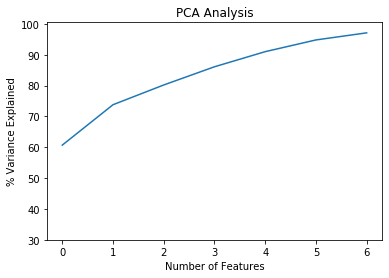

In [127]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [128]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

7 components explain 95% of the variation in data


In [129]:
pca = PCA(n_components=7, random_state = 0)
pca.fit(X)
X = pca.transform(X)
print(X.shape)

(13410, 7)


In [130]:
X

array([[-2.41382139,  1.78391778,  1.5329689 , ...,  0.53576951,
         1.6240354 , -0.7036961 ],
       [ 1.51170659, -0.70583651, -1.45693634, ..., -0.16804227,
        -1.03410213, -0.56679096],
       [-3.44925853,  0.83007509, -0.82351205, ...,  2.08144075,
         0.27460141,  1.16749818],
       ...,
       [ 4.56141765,  0.76071486, -1.98024881, ...,  0.34095284,
         0.63087801,  0.25448608],
       [-3.49019463, -0.89156914, -0.57194308, ..., -0.19019852,
         1.8714805 , -0.66665913],
       [ 4.64822693,  3.68135253,  1.59523811, ..., -1.03423177,
        -0.63880087, -0.44909625]])

In [131]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) 
X_train, X_test, y_train, y_test

(array([[ 2.52153808, -0.51969858, -1.80327906, ...,  0.27651941,
         -0.60859275,  0.35154462],
        [-3.39230951,  2.48165266,  1.31220512, ..., -0.10540309,
         -0.09317312,  0.4930609 ],
        [-3.51885825, -1.83064664,  1.87860629, ...,  1.00576299,
          0.8040715 ,  0.32405623],
        ...,
        [-3.3791686 ,  2.54377461,  0.72050684, ..., -1.65911623,
          0.40135672, -0.44157193],
        [-3.44021568,  0.88380999,  1.13413489, ...,  0.83326611,
          1.07709988,  0.32997194],
        [-3.40218347,  2.16129606, -0.06035631, ...,  0.09076645,
         -0.3912978 ,  0.45829718]]),
 array([[ 4.530882  , -0.31487785,  1.34570973, ..., -0.74163352,
          0.57619381, -0.54470627],
        [-3.40131039,  2.5814677 ,  0.23618229, ...,  1.5721147 ,
          0.04593341,  0.29509706],
        [-2.4361441 ,  0.91413577,  0.00818379, ..., -0.34929685,
         -1.32276804,  0.54155908],
        ...,
        [ 5.56008244,  0.74358399, -0.95385903, ..., -

In [132]:
X_train.shape

(9387, 7)

In [133]:
y_train.shape

(9387, 1)

In [134]:
y_train.head(2)

,status
6897,0
3524,0


In [135]:
X_test.shape

(4023, 7)

In [136]:
y_test.shape

(4023, 1)

knn

In [137]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fitting the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [138]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

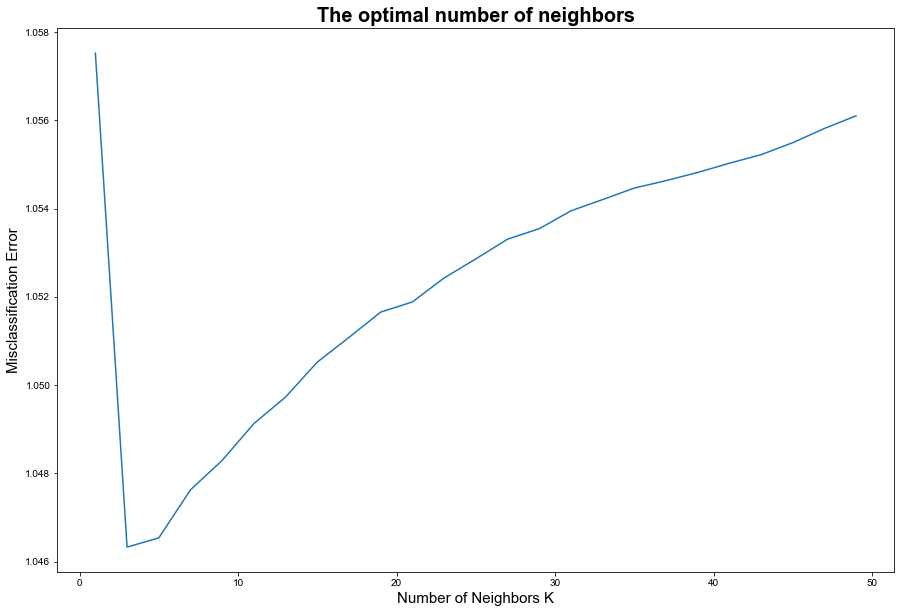

In [139]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [140]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


In [141]:
from sklearn.metrics import mean_squared_error
cm = mean_squared_error(y_test, y_pred)
cm

0.04830557626978209

In [142]:
from sklearn.metrics import mean_squared_error
cm = np.sqrt(mean_squared_error(y_test, y_pred))
cm

0.2197852958452455

DT

In [143]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [144]:
y_pred_test = model.predict(X_test)  

In [145]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9304001988565747


DT with grid search

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [147]:
y_pred_test1 = grid_search.predict(X_test)

In [148]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.9425801640566741


Logarithmic Regression

In [149]:
def classify(model,X_train,y_train,X_test,y_test):
    from sklearn.metrics import classification_report
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=4))

In [150]:
def accuracy(model,X_train,y_train,X_test,y_test):
    from sklearn.metrics import accuracy_score
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_preds)
    return accuracy

In [151]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
classify(model_LR,X_train,y_train,X_test,y_test)

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0     0.8108    0.9359    0.8689      3090
           1     0.5658    0.2765    0.3715       933

    accuracy                         0.7830      4023
   macro avg     0.6883    0.6062    0.6202      4023
weighted avg     0.7540    0.7830    0.7535      4023



In [152]:
accuracy(model_LR,X_train,y_train,X_test,y_test)

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7829977628635347

Ensemble Learning: Bagging

In [153]:
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()


num_est = 50

model = BaggingClassifier(base_estimator=dtc, n_estimators=num_est, max_samples= .60 ,random_state=7) 

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy score for test data is: 0.9589858314690529


Naive Bayes

In [154]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_test = gnb.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8655232413621675


D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Feature Engineering

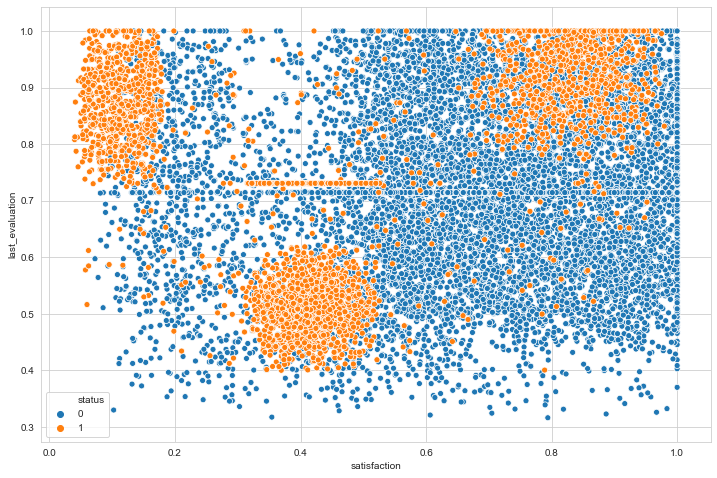

In [155]:
import plotly.express as px
plt.figure(figsize=(12,8))
df.sort_values('status', ascending=True, inplace=True)
sns.scatterplot(data=Train_sklearn, x='satisfaction', y='last_evaluation', hue='status')

We can see three clusters of the employees attrition:

    Underachiever: last_evaluation < 0.6
    Unsatisfied: satisfaction_level < 0.2
    Overachievers: last_evaluation > 0.8 and satisfaction > 0.7

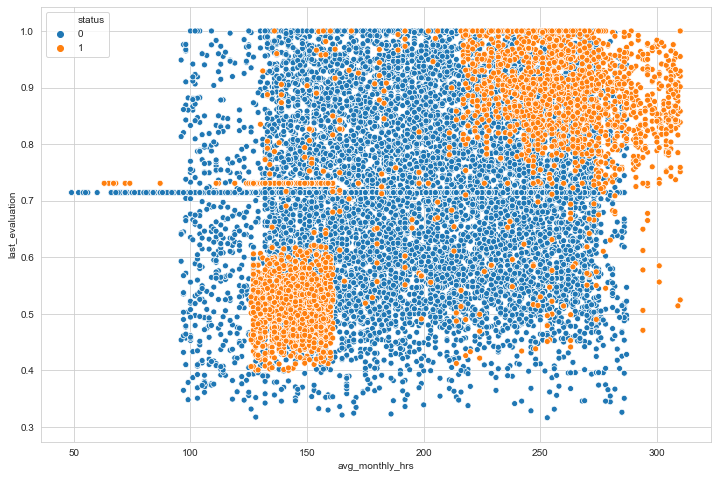

In [156]:
plt.figure(figsize=(12,8))
df.sort_values('status', ascending=True, inplace=True)
sns.scatterplot(data=Train_sklearn, x='avg_monthly_hrs', y='last_evaluation', hue='status')

We have two clusters of the employees attrition:

    Performer: avg_monthly_hrs > 215 and last_evaluation > 0.75
    Non-performer: avg_monthly_hrs < 165 and last_evaluation < 0.65

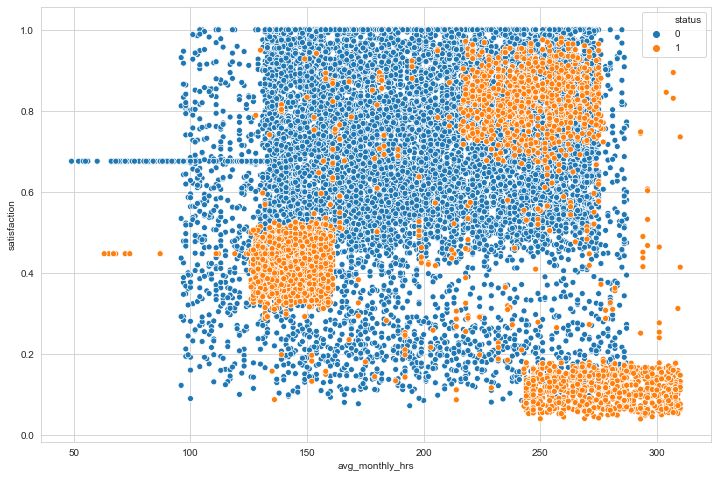

In [157]:
plt.figure(figsize=(12,8))
df.sort_values('status', ascending=True, inplace=True)
sns.scatterplot(data=Train_sklearn, x='avg_monthly_hrs', y='satisfaction', hue='status')

We have three clusters of employees attrition:

    Workaholics: avg_monthly_hrs > 210 and satisfation > 0.7
    Average: avg_monthly_hrs < 170
    Overloaded: avg_monthly_hrs > 225 and satisfaction < 0.2

In [158]:
Train_sklearn['underachiever'] = ((df1.last_evaluation < 0.6)).astype(int)
Train_sklearn['unsatisfied'] = (df1.satisfaction < 0.2).astype(int)
Train_sklearn['overachiever'] = ((df1.last_evaluation > 0.8) & (df1.satisfaction > 0.7)).astype(int)
Train_sklearn['performer'] = ((df1.avg_monthly_hrs > 215) & (df1.last_evaluation > 0.75)).astype(int)
Train_sklearn['nonperformer'] = ((df1.avg_monthly_hrs < 165) & (df1.last_evaluation < 0.65)).astype(int)
Train_sklearn['workaholic'] = ((df1.avg_monthly_hrs > 210) & (df1.satisfaction > 0.7)).astype(int)
Train_sklearn['average'] = (df1.avg_monthly_hrs < 170).astype(int)
Train_sklearn['overloaded'] = ((df1.avg_monthly_hrs > 225) & (df1.satisfaction < 0.2)).astype(int)

In [159]:
Train_sklearn[['underachiever', 'unsatisfied', 'overachiever', 'performer', 
    'nonperformer', 'workaholic', 'average', 'overloaded']].mean()

underachiever    0.281655
unsatisfied      0.090679
overachiever     0.175019
performer        0.239746
nonperformer     0.164952
workaholic       0.224758
average          0.345041
overloaded       0.070321
dtype: float64

In [164]:
T = Train_sklearn.drop(['employee_id', 'department'], axis = 1)

In [165]:
for col in T.columns: 
    print(col) 

age
gender
marital_status
tenure
salary
avg_monthly_hrs
filed_complaint
n_projects
last_evaluation
recently_promoted
satisfaction
status
dept_code
underachiever
unsatisfied
overachiever
performer
nonperformer
workaholic
average
overloaded


In [166]:
T.head(2)

,age,gender,marital_status,tenure,salary,avg_monthly_hrs,filed_complaint,n_projects,last_evaluation,recently_promoted,...,status,dept_code,underachiever,unsatisfied,overachiever,performer,nonperformer,workaholic,average,overloaded
1686,35.0,0,1,6.0,0,257.0,1.0,6,0.497813,0.0,...,0,8,1,0,0,0,0,0,0,0
1689,27.0,0,0,3.0,0,178.0,0.0,3,0.933046,0.0,...,0,4,0,0,1,0,0,0,0,0


In [167]:
T_cont_data = Train_sklearn[['age','tenure','avg_monthly_hrs','n_projects','last_evaluation','satisfaction']]
T_cont_data.head(2)

,age,tenure,avg_monthly_hrs,n_projects,last_evaluation,satisfaction
1686,35.0,6.0,257.0,6,0.497813,0.418404
1689,27.0,3.0,178.0,3,0.933046,0.826652


In [168]:
T_cat_data = Train_sklearn[['marital_status','salary','filed_complaint','recently_promoted','status','dept_code','underachiever','unsatisfied','overachiever','performer','nonperformer','workaholic','average','overloaded']]
T_cat_data.head(2)

,marital_status,salary,filed_complaint,recently_promoted,status,dept_code,underachiever,unsatisfied,overachiever,performer,nonperformer,workaholic,average,overloaded
1686,1,0,1.0,0.0,0,8,1,0,0,0,0,0,0,0
1689,0,0,0.0,0.0,0,4,0,0,1,0,0,0,0,0


In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(T_cont_data)
cont_sc = sc.transform(T_cont_data)

In [171]:
T_sc = pd.DataFrame(cont_sc)

In [172]:
#I had to do this step before merging because without this step it gave missing values
T_sc.reset_index(drop=True, inplace=True)  
T_cat_data.reset_index(drop=True, inplace=True)

In [173]:
T_final = pd.concat([T_sc, T_cat_data], axis = 1)

In [174]:
T_final.head(2)

,0,1,2,3,4,5,marital_status,salary,filed_complaint,recently_promoted,status,dept_code,underachiever,unsatisfied,overachiever,performer,nonperformer,workaholic,average,overloaded
0,0.207313,1.706015,1.120246,1.773146,-1.347436,-0.818945,1,0,1.0,0.0,0,8,1,0,0,0,0,0,0,0
1,-0.594638,-0.340288,-0.433606,-0.626560,1.313493,0.819417,0,0,0.0,0.0,0,4,0,0,1,0,0,0,0,0


In [175]:
X_new = df_Train.drop('status', axis = 1)
y_new = df_Train.loc[:,df_Train.columns == 'status']
y_new.dtypes

status    object
dtype: object

In [176]:
y_new = y_new.astype(int)
y_new.dtypes

status    int32
dtype: object

In [177]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X_new)

#### Variance Graph

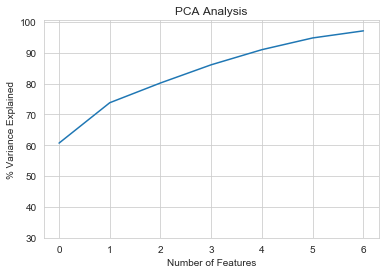

In [178]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [179]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

7 components explain 95% of the variation in data


In [180]:
pca = PCA(n_components=7, random_state = 0)
pca.fit(X_new)
X = pca.transform(X_new)
print(X.shape)

(13410, 7)


In [181]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.3, random_state=3) 
X_train, X_test, y_train, y_test

(array([[ 2.52153808, -0.51969858, -1.80327906, ...,  0.27651941,
         -0.60859275,  0.35154462],
        [-3.39230951,  2.48165266,  1.31220512, ..., -0.10540309,
         -0.09317312,  0.4930609 ],
        [-3.51885825, -1.83064664,  1.87860629, ...,  1.00576299,
          0.8040715 ,  0.32405623],
        ...,
        [-3.3791686 ,  2.54377461,  0.72050684, ..., -1.65911623,
          0.40135672, -0.44157193],
        [-3.44021568,  0.88380999,  1.13413489, ...,  0.83326611,
          1.07709988,  0.32997194],
        [-3.40218347,  2.16129606, -0.06035631, ...,  0.09076645,
         -0.3912978 ,  0.45829718]]),
 array([[ 4.530882  , -0.31487785,  1.34570973, ..., -0.74163352,
          0.57619381, -0.54470627],
        [-3.40131039,  2.5814677 ,  0.23618229, ...,  1.5721147 ,
          0.04593341,  0.29509706],
        [-2.4361441 ,  0.91413577,  0.00818379, ..., -0.34929685,
         -1.32276804,  0.54155908],
        ...,
        [ 5.56008244,  0.74358399, -0.95385903, ..., -

#### DT

In [186]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier(random_state = 0)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [183]:
y_pred_test = model1.predict(X_test)  

In [187]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9304001988565747


#### DT with Grid search

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [188]:
y_pred_test1 = grid_search.predict(X_test)

In [189]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.9425801640566741


#### Logarithmic Regression

In [190]:
def classify(model,X_train,y_train,X_test,y_test):
    from sklearn.metrics import classification_report
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=4))

In [191]:
def accuracy(model,X_train,y_train,X_test,y_test):
    from sklearn.metrics import accuracy_score
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_preds)
    return accuracy

In [192]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
classify(model_LR,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0     0.8108    0.9359    0.8689      3090
           1     0.5658    0.2765    0.3715       933

    accuracy                         0.7830      4023
   macro avg     0.6883    0.6062    0.6202      4023
weighted avg     0.7540    0.7830    0.7535      4023



D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [193]:
accuracy(model_LR,X_train,y_train,X_test,y_test)

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7829977628635347

#### Ensemble Learning 

In [194]:
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()


num_est = 50

model = BaggingClassifier(base_estimator=dtc, n_estimators=num_est, max_samples= .60 ,random_state=7) 

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy score for test data is: 0.9589858314690529


#### Naive Bayes

In [195]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_test = gnb.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8655232413621675


D:\Users\Sulakshana\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Conclusion
1. After PCA, same performance is obtained for all the models before feature engineering and after feature engineering.
2. Bagging classifier performs best.